In [1]:
# multiclassification problem
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels),  (test_data, test_labels) = imdb.load_data(num_words = 10000)
print(train_data[0], "\n\n")     # getting data points
print(train_labels[0], "\n\n")   # first indent case

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 


1 




In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])      # looping through all the values
decoded_review = ' '.join([reverse_word_index.get(i - 3, '') for i in train_data[1]])

decoded_review      # print decoded review

" big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal  the hair is big lots of boobs  men wear those cut  shirts that show off their  sickening that men actually wore them and the music is just  trash that plays over and over again in almost every scene there is trashy music boobs and  taking away bodies and the gym still doesn't close for  all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [4]:
# making function to encode the data

def vectorize_data(input, dims = 10000):
    arr = np.zeros(shape=(len(input), dims))

    for i, seq in enumerate(input):
        arr[i, seq] = 1
    
    return arr

train_data = vectorize_data(train_data)
test_data = vectorize_data(test_data)

# vectorising labels
train_labels = np.asarray(train_labels).astype('float32')
test_labels = np.asarray(test_labels).astype('float32')


In [5]:
from keras import models, layers

In [6]:
network = models.Sequential()

network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

In [7]:
from keras import optimizers

network.compile(optimizer= optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# training the model
val_data = train_data[:10000]
train_data = train_data[10000:]

val_labels = train_labels[:10000]
train_labels = train_labels[10000:]

In [9]:
history = network.fit(train_data, train_labels, batch_size=512, epochs=20, validation_data=(val_data, val_labels))


Epoch 1/20
30/30 [==============================] - 10s 247ms/step - loss: 0.5198 - accuracy: 0.7955 - val_loss: 0.3946 - val_accuracy: 0.8693
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3134 - accuracy: 0.9009 - val_loss: 0.3144 - val_accuracy: 0.8816
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2314 - accuracy: 0.9241 - val_loss: 0.2808 - val_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1813 - accuracy: 0.9420 - val_loss: 0.2727 - val_accuracy: 0.8903
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1489 - accuracy: 0.9523 - val_loss: 0.2805 - val_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1213 - accuracy: 0.9619 - val_loss: 0.2955 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1024 - accuracy: 0.9685 - val_loss: 0.3111 - val_accuracy: 0.8813
Epoch 8/20


In [10]:
history_dict = history.history

history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [11]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,  len(loss_values) + 1)

C:\Users\Mahrukh Khan\AppData\Local\Temp\ipykernel_14448\4172408244.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, 'bo', label='training loss', color="red")
C:\Users\Mahrukh Khan\AppData\Local\Temp\ipykernel_14448\4172408244.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', label='validation loss', color="black")


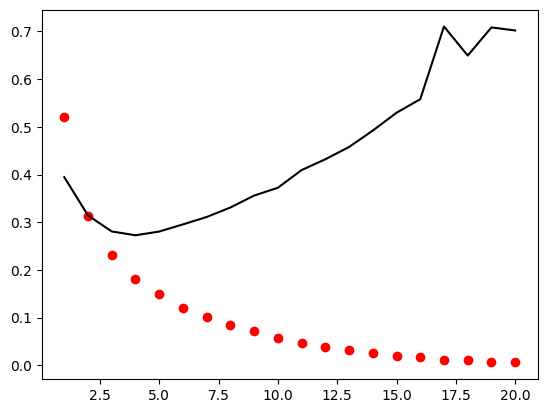

In [17]:
plt.plot(epochs, loss_values, 'bo', label='training loss', color="red")
plt.plot(epochs, val_loss_values, 'b', label='validation loss', color="black")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


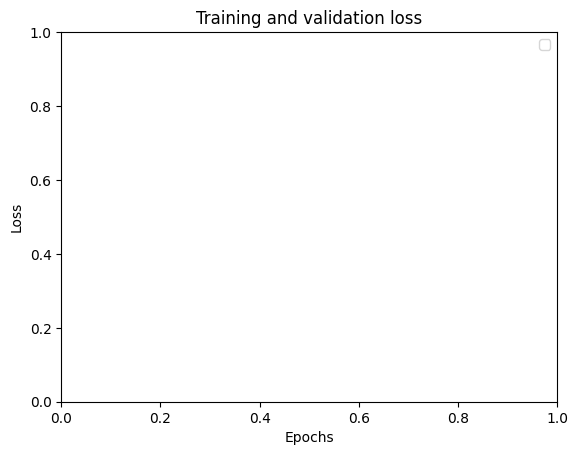

In [13]:
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

model.fit(train_data, train_labels, epochs=4, batch_size=512)
results = model.evaluate(test_data, test_labels)

Epoch 1/4
30/30 [==============================] - 2s 19ms/step - loss: 0.5481 - accuracy: 0.7550
Epoch 2/4
30/30 [==============================] - 1s 20ms/step - loss: 0.3414 - accuracy: 0.8891
Epoch 3/4
30/30 [==============================] - 1s 18ms/step - loss: 0.2517 - accuracy: 0.9178
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2885 - accuracy: 0.8845


In [15]:
results

[0.288522332906723, 0.8845199942588806]